In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pandas import set_option
%matplotlib inline

import statsmodels.api as sm
import pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
bike_train = pd.read_excel("bike_train.xlsx")

# ANÁLISIS EXPLORATORIO

In [3]:
data_to_eda = bike_train.copy()

data_to_eda.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

#### ESTADÍSTICA DESCRIPTIVA

In [4]:
statistics = data_to_eda.describe().T
statistics

count         mean          std   min        25%        50%  \
instant     11999.0  6000.000000  3463.957275  1.00  3000.5000  6000.0000   
season      11999.0     2.210684     1.088798  1.00     1.0000     2.0000   
yr          11999.0     0.279523     0.448784  0.00     0.0000     0.0000   
mnth        11999.0     5.530294     3.433005  1.00     3.0000     5.0000   
hr          11999.0    11.556630     6.911891  0.00     6.0000    12.0000   
holiday     11999.0     0.027752     0.164269  0.00     0.0000     0.0000   
weekday     11999.0     3.009334     2.005264  0.00     1.0000     3.0000   
workingday  11999.0     0.684057     0.464910  0.00     0.0000     1.0000   
weathersit  11999.0     1.435036     0.650894  1.00     1.0000     1.0000   
temp        11999.0     0.465704     0.188576  0.02     0.3200     0.4600   
atemp       11999.0     0.448888     0.169633  0.00     0.3030     0.4545   
hum         11999.0     0.625770     0.200637  0.00     0.4700     0.6200   
windspeed   11999.0     0.196433     0.125394  0.00     0.1045     0.1940   
casual      11999.0    30.049837    43.596915  0.00     3.0000    13.0000   
registered  11999.0   128.545129   124.692750  0.00    29.0000    98.0000   
cnt         11999.0   158.594966   151.392952  1.00    34.0000   118.0000   

                  75%         max  
instant     8999.5000  11999.0000  
season         3.0000      4.0000  
yr             1.0000      1.0000  
mnth           8.0000     12.0000  
hr            18.0000     23.0000  
holiday        0.0000      1.0000  
weekday        5.0000      6.0000  
workingday     1.0000      1.0000  
weathersit     2.0000      4.0000  
temp           0.6200      0.9600  
atemp          0.5909      1.0000  
hum            0.7900      1.0000  
windspeed      0.2836      0.8507  
casual        39.0000    367.0000  
registered   185.0000    770.0000  
cnt          232.0000    957.0000

#### MODIFICANDO COLUMNAS Y AÑADIENDO COLUMNA

In [5]:
#Agregamos una columna 'periodo'
data_to_eda['periodo'] = data_to_eda['dteday'].dt.strftime('%Y/%m')

In [6]:
# Creando el diccionario con los nuevos valores que serán insertados en las columnas referidas

nombre_estaciones = {1: 'primavera', 2: 'verano', 3: 'otoño', 4: 'invierno'}

valor_year = {0: 2011, 1: 2012}

nombre_dia = {
    0: 'domingo', 1: 'lunes', 2: 'martes', 
    3: 'miércoles', 4: 'jueves', 5: 'viernes', 
    6: 'sábado', 7: 'domingo'
}

nombre_mes = {
    1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril',
    5: 'mayo', 6: 'junio', 7: 'julio', 8: 'agosto', 
    9: 'setiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'
}

clima = {
    1: 'despejado', 2: 'nublado', 
    3: 'nieve_ligera_llovizna', 4: 'lluvia_fuerte_granizo'
}

In [7]:
# Cambiando los valores por defecto que tiene el data set

data_to_eda['season'] = data_to_eda['season'].apply(lambda x: nombre_estaciones[x])
data_to_eda['yr'] = data_to_eda['yr'].apply(lambda x: valor_year[x])
data_to_eda['weekday'] = data_to_eda['weekday'].apply(lambda x: nombre_dia[x])
data_to_eda['mnth'] = data_to_eda['mnth'].apply(lambda x: nombre_mes[x])
data_to_eda['weathersit'] = data_to_eda['weathersit'].apply(lambda x: clima[x])

#### PLOTEANDO LA CANTIDAD DE BICICLETAS RENTADAS

Text(0, 0.5, 'cantidad de bicicletas rentadas por día (2011-2012)')

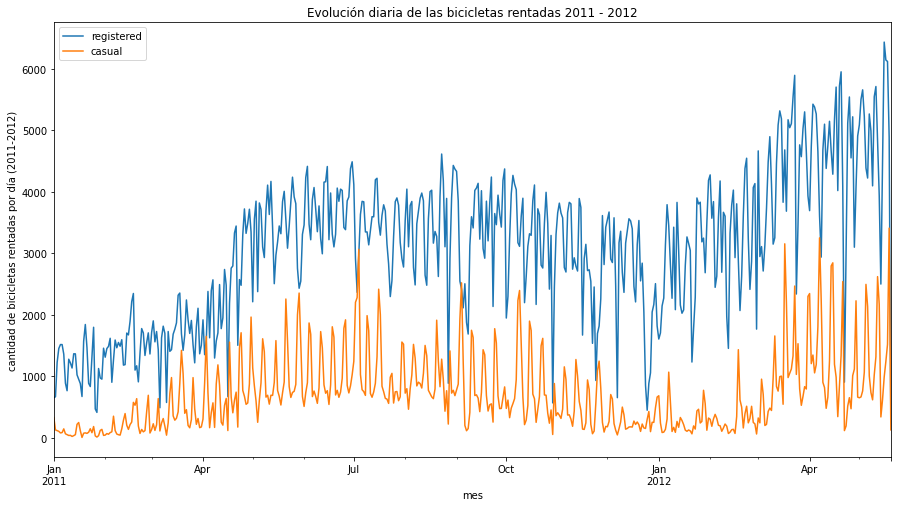

In [8]:
plot_data = data_to_eda[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(15,8))
ax.set_title("Evolución diaria de las bicicletas rentadas 2011 - 2012")
ax.set_xlabel("mes");
ax.set_ylabel("cantidad de bicicletas rentadas por día (2011-2012)")

#### RENTAS MENSUALES

In [9]:
renta_total_mensual = data_to_eda[['periodo', 'cnt']].groupby('periodo').sum()
px.bar(renta_total_mensual, x=renta_total_mensual.index, y=renta_total_mensual.columns, title="Cantidad de Bicicletas Rentadas")

en abril del 2012 se rentaron la mayor cantidad de bicicletas siendo dicho valor de 174.224K

#### Cantidad de bicicletas rentadas por clima

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

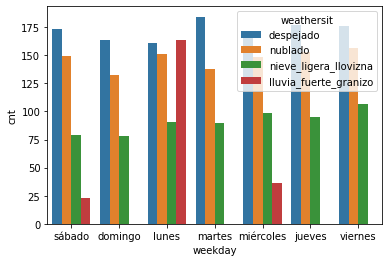

In [10]:
sns.barplot(data = data_to_eda, x = "weekday", y = "cnt", hue = "weathersit", ci = None)

OCURRE QUE SIN IMPORTAR EL DIA DE LA SEMANA CUANDO EL CLIMA ESTA DESPEJADO SIEMPRE SE RENTA LA MAYOR CANTIDAD DE BICICLETAS

#### Cantidad de Bicicletas Rentadas Registradas

In [11]:
renta_total_mensual_reg = data_to_eda[['periodo', 'registered']].groupby('periodo').sum()
px.bar(renta_total_mensual_reg, x=renta_total_mensual_reg.index, y=renta_total_mensual_reg.columns, title="Cantidad de Bicicletas Rentadas Registradas")

En el mes de marzo del 2012 se rentaron la mayor cantidad de bicicletas bajo registro con un valor de 135.768K

#### Cantidad de Bicicletas Rentadas Casuales

In [12]:
renta_total_mensual_cas = data_to_eda[['periodo', 'casual']].groupby('periodo').sum()
px.bar(renta_total_mensual_cas, x=renta_total_mensual_cas.index, y=renta_total_mensual_cas.columns, title="Cantidad de Bicicletas Rentadas Casuales")

En el mes de abril del 2012 se rentado la mayor cantidad de bicicletas en modo casual siendo el valor de 38.456K

#### Cantidad de Bicicletas Rentadas Registradas por Hora

In [13]:
renta_total_hora_reg = data_to_eda[['hr', 'registered']].groupby('hr').sum()
px.bar(renta_total_hora_reg, x=renta_total_hora_reg.index, y=renta_total_hora_reg.columns, title="Cantidad de Bicicletas Rentadas Registradas por Hora")

Podemos notar que a las 17 horas se presenta la mayor cantidad de bicicletas rentadas registradas con un valor de 164.089K (esto es el acumulado de los años 2011 y 2012)

#### Cantidad de Bicicletas Rentadas Casuales por Hora

In [14]:
renta_total_hora_cas = data_to_eda[['hr', 'casual']].groupby('hr').sum()
px.bar(renta_total_hora_cas, x=renta_total_hora_cas.index, y=renta_total_hora_cas.columns, title="Cantidad de Bicicletas Rentadas Casuales por Hora")

Podemos notar que a las 15 horas se presenta la mayor cantidad de bicicletas rentadas de forma casual con un valor de 32.096K (esto es el acumulado de los años 2011 y 2012)

# SELECCIONANDO NUESTROS FEATURES

In [15]:
bike_train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
columns = ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 
           'holiday', 'weekday', 'workingday', 'weathersit', 
           'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

#### PAIRPLOT

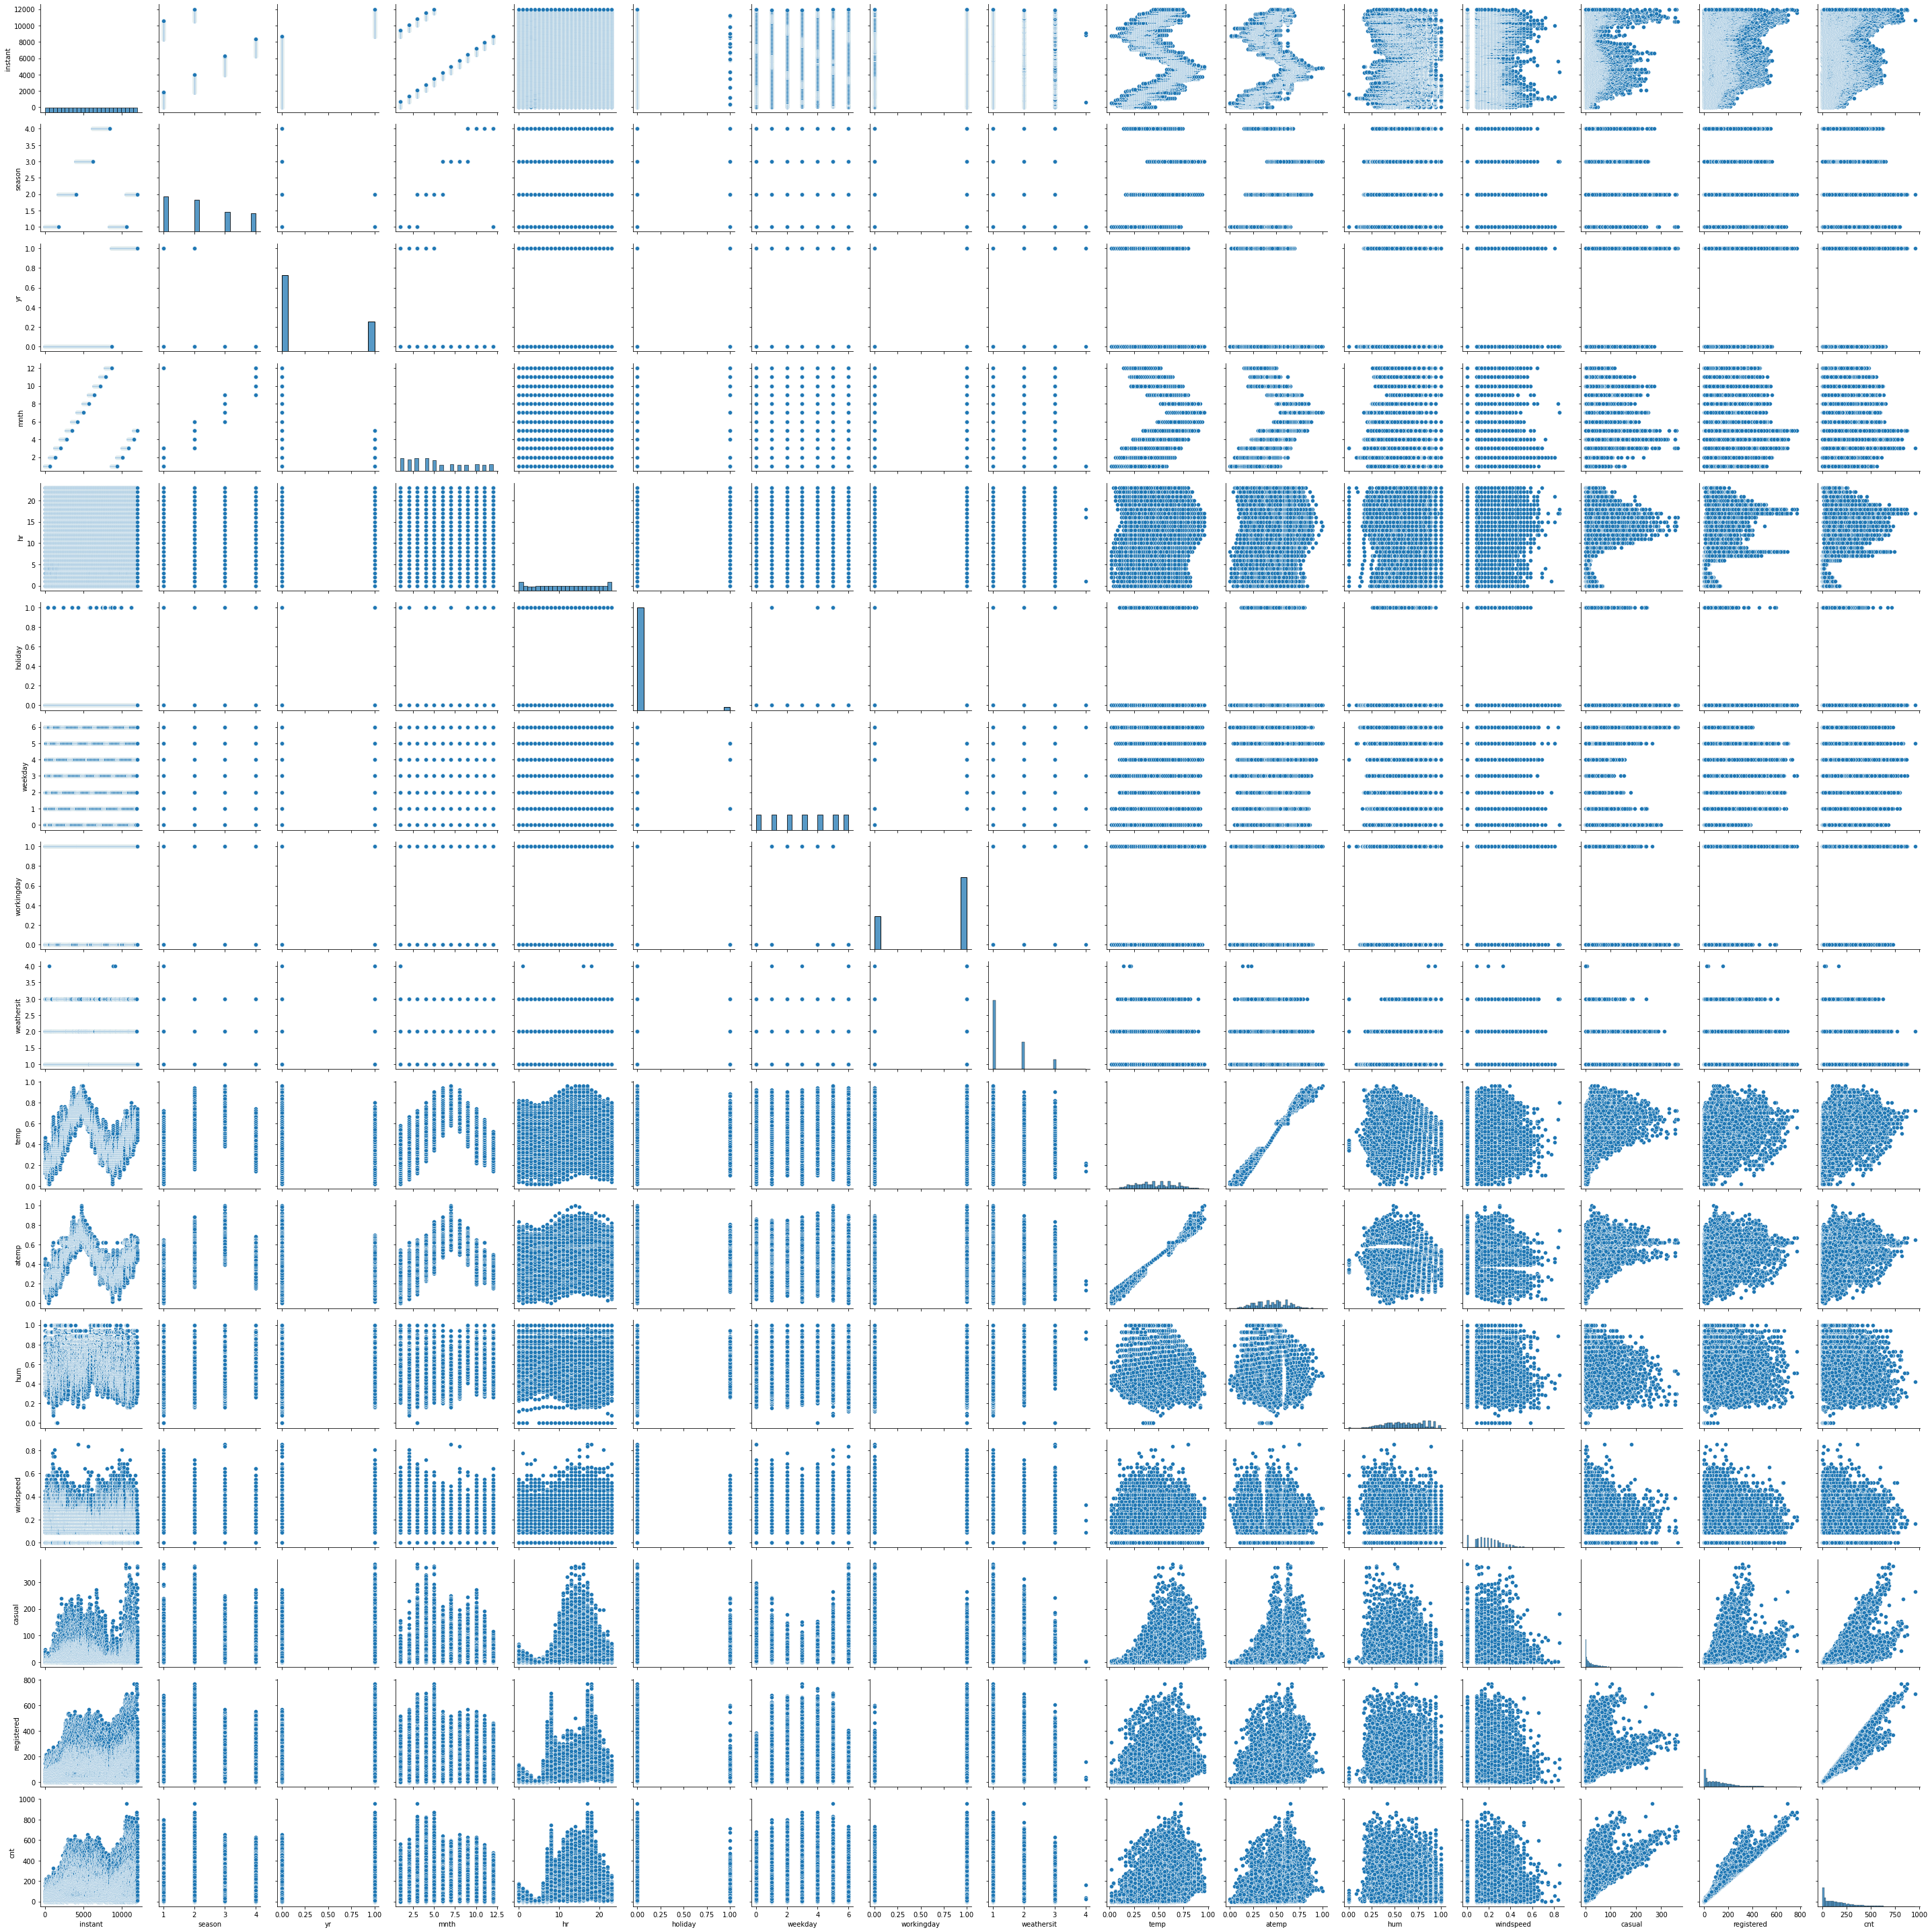

In [17]:
sns.pairplot(bike_train[columns], 
             height=2.5)
plt.tight_layout()
# plt.savefig('imagenes/10_03.png', dpi=300)
plt.show()

#### MATRIZ DE CORRELACIÓN

In [18]:
correlation_matrix = bike_train.corr()
correlation_matrix

instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.118039  0.777284  0.167195 -0.007446  0.008323   
season      0.118039  1.000000 -0.446665  0.865268 -0.007610 -0.008928   
yr          0.777284 -0.446665  1.000000 -0.488103 -0.003948  0.001039   
mnth        0.167195  0.865268 -0.488103  1.000000 -0.007060  0.009372   
hr         -0.007446 -0.007610 -0.003948 -0.007060  1.000000  0.000414   
holiday     0.008323 -0.008928  0.001039  0.009372  0.000414  1.000000   
weekday     0.007103 -0.003688 -0.002714  0.014500 -0.004037 -0.102503   
workingday  0.005295  0.012630  0.001068  0.006441  0.003454 -0.248601   
weathersit -0.015359 -0.009029 -0.006309 -0.012239 -0.024003 -0.014707   
temp        0.029297  0.410790 -0.198929  0.353330  0.139251 -0.028519   
atemp       0.042490  0.413196 -0.190360  0.358541  0.134633 -0.038005   
hum        -0.013275  0.198937 -0.141319  0.201669 -0.257202 -0.036672   
windspeed  -0.029001 -0.142924  0.067356 -0.147042  0.130441  0.022681   
casual      0.115768  0.119043  0.053371  0.078563  0.285182  0.022140   
registered  0.238546  0.093595  0.171910  0.061686  0.381933 -0.044534   
cnt         0.229814  0.111369  0.156960  0.073431  0.396698 -0.030304   

             weekday  workingday  weathersit      temp     atemp       hum  \
instant     0.007103    0.005295   -0.015359  0.029297  0.042490 -0.013275   
season     -0.003688    0.012630   -0.009029  0.410790  0.413196  0.198937   
yr         -0.002714    0.001068   -0.006309 -0.198929 -0.190360 -0.141319   
mnth        0.014500    0.006441   -0.012239  0.353330  0.358541  0.201669   
hr         -0.004037    0.003454   -0.024003  0.139251  0.134633 -0.257202   
holiday    -0.102503   -0.248601   -0.014707 -0.028519 -0.038005 -0.036672   
weekday     1.000000    0.031057    0.017259 -0.010002 -0.009841 -0.025932   
workingday  0.031057    1.000000    0.042202  0.062273  0.066305  0.022805   
weathersit  0.017259    0.042202    1.000000 -0.080149 -0.081386  0.430378   
temp       -0.010002    0.062273   -0.080149  1.000000  0.991785 -0.019289   
atemp      -0.009841    0.066305   -0.081386  0.991785  1.000000 -0.003669   
hum        -0.025932    0.022805    0.430378 -0.019289 -0.003669  1.000000   
windspeed   0.008447   -0.002493    0.009195 -0.013984 -0.057619 -0.295765   
casual      0.023687   -0.298241   -0.147903  0.450777  0.447899 -0.298354   
registered  0.019179    0.134789   -0.130223  0.322875  0.323264 -0.264382   
cnt         0.022618    0.025132   -0.149848  0.395743  0.395234 -0.303672   

            windspeed    casual  registered       cnt  
instant     -0.029001  0.115768    0.238546  0.229814  
season      -0.142924  0.119043    0.093595  0.111369  
yr           0.067356  0.053371    0.171910  0.156960  
mnth        -0.147042  0.078563    0.061686  0.073431  
hr           0.130441  0.285182    0.381933  0.396698  
holiday      0.022681  0.022140   -0.044534 -0.030304  
weekday      0.008447  0.023687    0.019179  0.022618  
workingday  -0.002493 -0.298241    0.134789  0.025132  
weathersit   0.009195 -0.147903   -0.130223 -0.149848  
temp        -0.013984  0.450777    0.322875  0.395743  
atemp       -0.057619  0.447899    0.323264  0.395234  
hum         -0.295765 -0.298354   -0.264382 -0.303672  
windspeed    1.000000  0.067061    0.091642  0.094791  
casual       0.067061  1.000000    0.503185  0.702414  
registered   0.091642  0.503185    1.000000  0.968540  
cnt          0.094791  0.702414    0.968540  1.000000

#### MAPA DE CALOR DE LA MATRIZ DE CORRELACIÓN

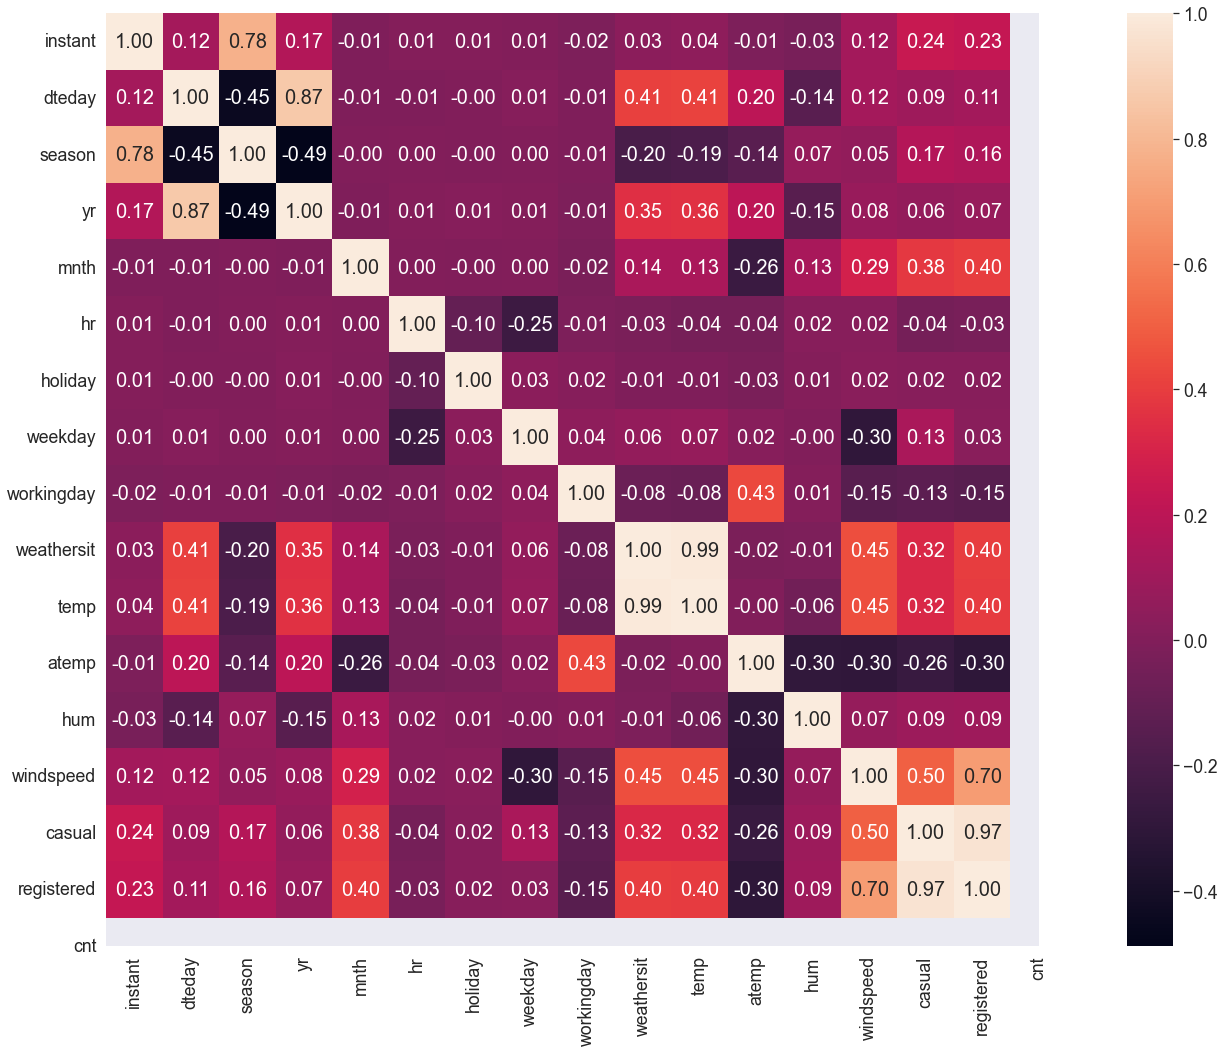

In [19]:
sns.set(rc = {'figure.figsize':(25,15)})
sns.set(font_scale=1.6)

hm = sns.heatmap(correlation_matrix,#valores de la matriz de correlación
                 cbar=True, 
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 20},
                 yticklabels=columns, #etiquetas guardadas en cols
                 xticklabels=columns) #etiquetas guardadas en cols

plt.tight_layout()
#plt.savefig('imagenes/10_04.png', dpi=300)
plt.show()

#### COLUMNAS SELECCIONADAS

Según la correlación presentada por cada una de las variables, tenemos que las columnas que presentan mayor correlación con respecto a nuestra variable objetivo son: **'hr', 'temp', 'atemp', 'casual', 'registered'**

In [20]:
#'casual', 'registered': el modelo debio ser entrenado con
#estas columnas pero el dataset de prueba no las considera es por ello que las retiraremos
X = bike_train[['hr', 'temp', 'atemp']]
y = bike_train['cnt']

# DIVIDIENDO NUESTROS DATOS CON LAS COLUMNAS PREVIAMENTES SELECCIONADAS

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [22]:
print(f" Shape of training set: {X_train.shape}")
print(f" Shape of testing set: {X_test.shape}")

 Shape of training set: (8399, 3)
 Shape of testing set: (3600, 3)


# MODELO LINEAR REGRESSION

In [23]:
Linear_Regressor = LinearRegression()
Linear_Regressor.fit(X_train, y_train)
LR_reg_pred_train = Linear_Regressor.predict(X_train)

accuracy_LR = mean_squared_error(y_train, LR_reg_pred_train)
print('LR - Root Mean square error: = ', np.sqrt(accuracy_LR))
print('LR - R2 accuracy : ',r2_score(y_train, LR_reg_pred_train))


LR - Root Mean square error: =  129.98431368472714
LR - R2 accuracy :  0.2698310574538014


# MODELO XGB

#### ENTRENANDO EL MODELO

In [24]:
XGB_Regressor = XGBRegressor()
XGB_Regressor.fit(X_train, y_train)

XGB_reg_pred_train = XGB_Regressor.predict(X_train)

XGB_reg_pred_test = XGB_Regressor.predict(X_test)

#### GRÁFICA DE RESIDUOS

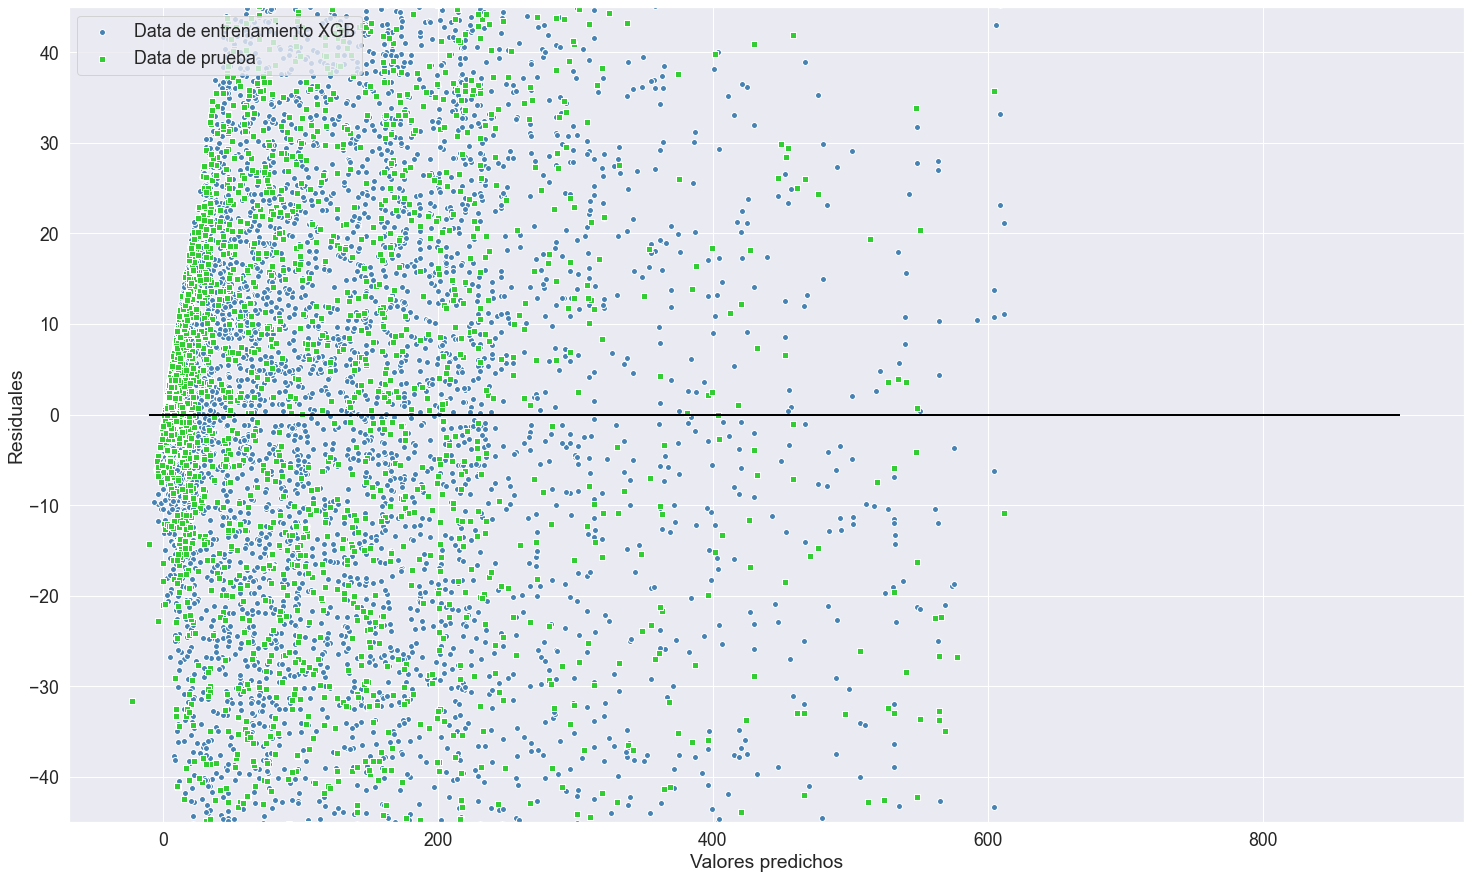

In [25]:
plt.scatter(XGB_reg_pred_train, XGB_reg_pred_train - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Data de entrenamiento XGB')
plt.scatter(XGB_reg_pred_test, XGB_reg_pred_test - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Data de prueba')
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=900, color='black', lw=2)
#plt.xlim([-10, 50])
plt.ylim([-45, 45])
#plt.tight_layout()

plt.show()

#### GRÁFICA Q-Q PLOT

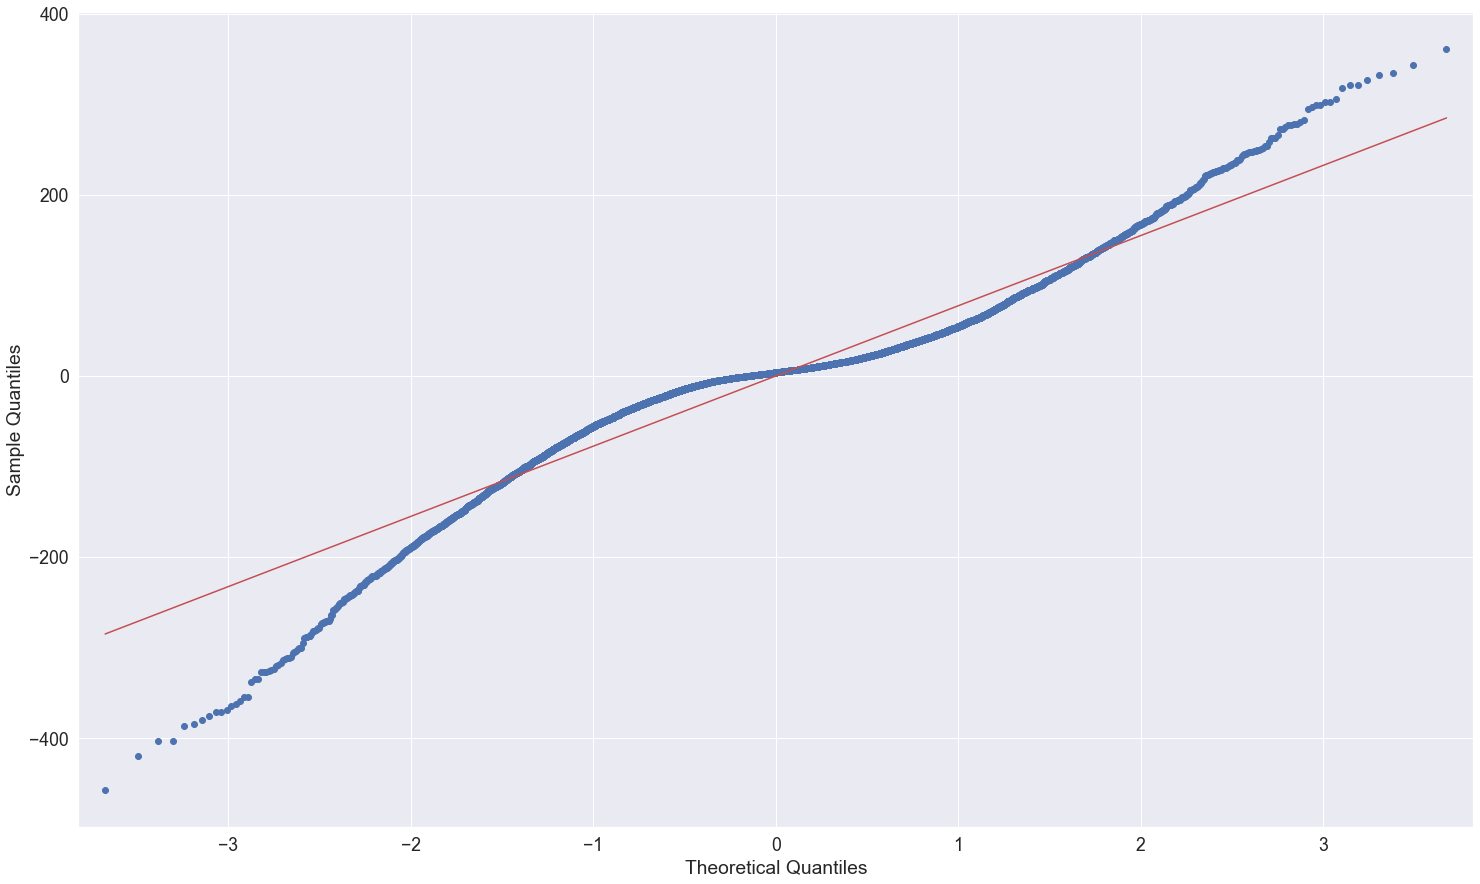

In [26]:
residuales = XGB_reg_pred_train - y_train

sm.qqplot(residuales,line='s')
pylab.show()

#### EVALUANDO EL DESEMPEÑO DEL MODELO

In [27]:
accuracy_XGB = mean_squared_error(y_train, XGB_reg_pred_train)
print('XGB - Root Mean square error: = ', np.sqrt(accuracy_XGB))
print('XGB - R2 accuracy : ',r2_score(y_train, XGB_reg_pred_train))

XGB - Root Mean square error: =  77.55290402111916
XGB - R2 accuracy :  0.7400812585989114


# MODELO LGBM

#### ENTRENANDO EL MODELO

In [28]:
LGBM_Regressor = LGBMRegressor()
LGBM_Regressor.fit(X_train, y_train)

LGBM_reg_pred_train = LGBM_Regressor.predict(X_train)
LGBM_reg_pred_test = LGBM_Regressor.predict(X_test)

#### GRÁFICA DE RESIDUOS

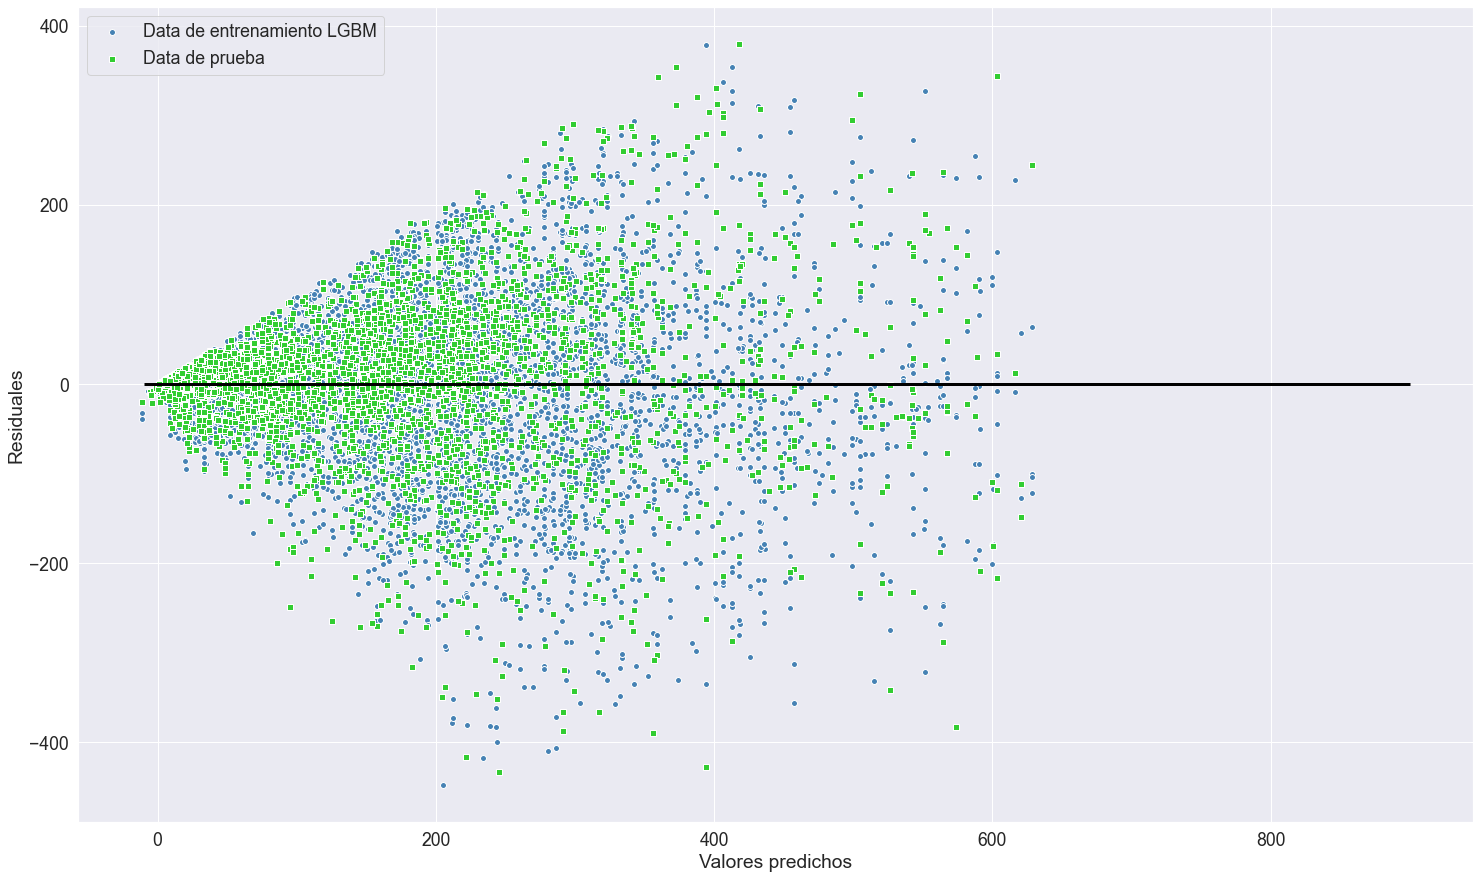

In [29]:
plt.scatter(LGBM_reg_pred_train, LGBM_reg_pred_train - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Data de entrenamiento LGBM')
plt.scatter(LGBM_reg_pred_test, LGBM_reg_pred_test - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Data de prueba')
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=900, color='black', lw=3)
#plt.xlim([-10, 900])
#plt.ylim([-70, 50])
#plt.tight_layout()

plt.show()

#### GRÁFICA Q-Q PLOT

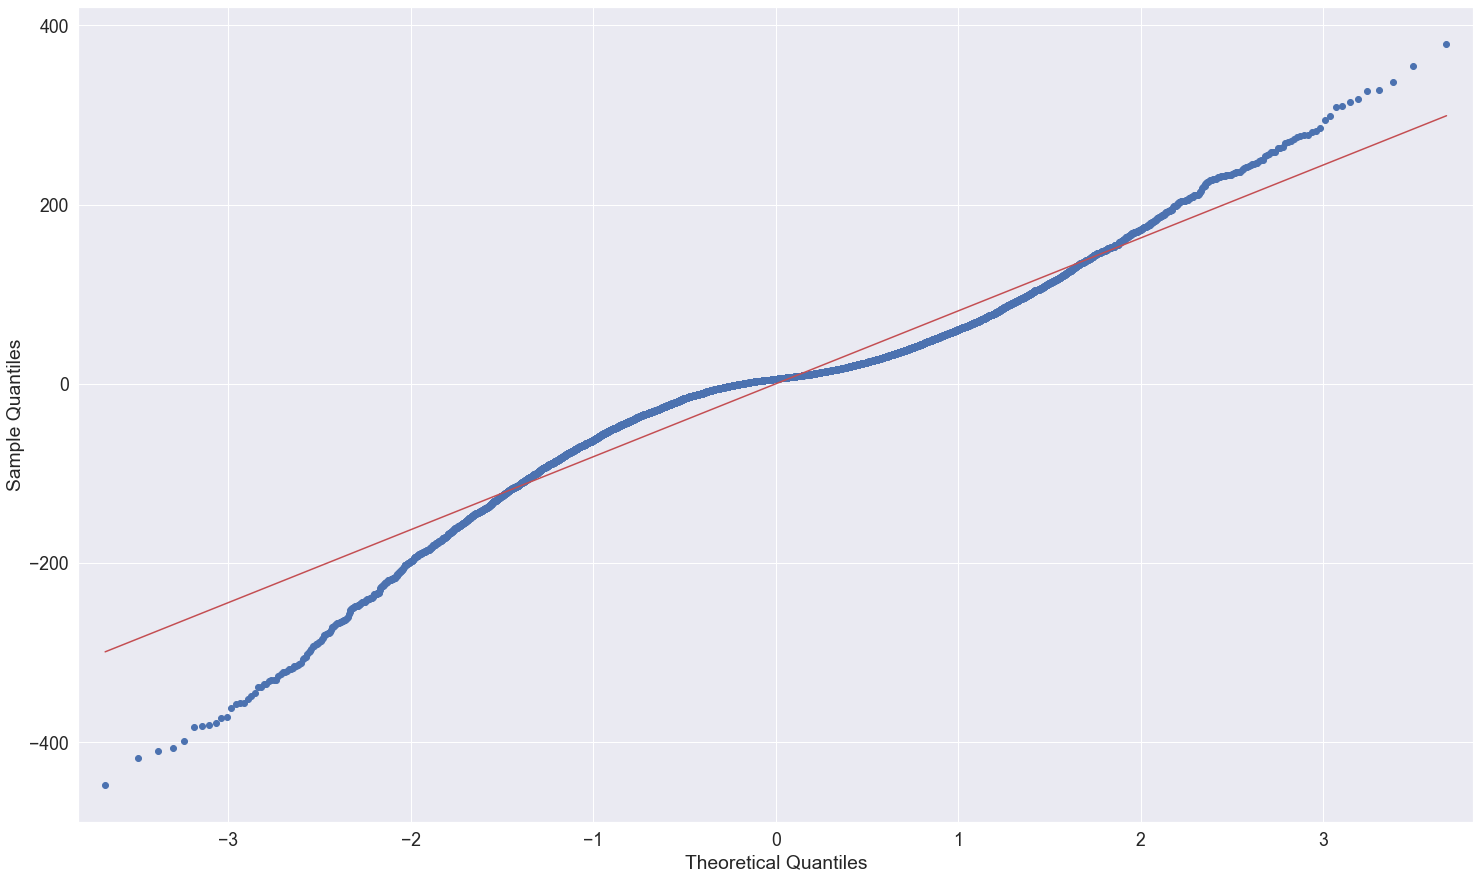

In [30]:
residuales = LGBM_reg_pred_train - y_train

sm.qqplot(residuales,line='s')
pylab.show()

#### EVALUANDO EL DESEMPEÑO DEL MODELO

In [31]:
accuracy_LGBM = mean_squared_error(y_train, LGBM_reg_pred_train)
print('LGBM - Root Mean square error: = ', np.sqrt(accuracy_LGBM))
print('LGBM - R2 accuracy : ',r2_score(y_train, LGBM_reg_pred_train))

LGBM - Root Mean square error: =  81.3747597840092
LGBM - R2 accuracy :  0.7138321078096779


# MODELO Cat Boost

#### ENTRENANDO EL MODELO

In [32]:
Cat_Boost_Regressor = CatBoostRegressor()
Cat_Boost_Regressor.fit(X_train, y_train)

Cat_Boost_reg_pred_train = Cat_Boost_Regressor.predict(X_train)
Cat_Boost_reg_pred_test = Cat_Boost_Regressor.predict(X_test)

Learning rate set to 0.057307
0:	learn: 147.2183282	total: 142ms	remaining: 2m 21s
1:	learn: 142.6765348	total: 152ms	remaining: 1m 15s
2:	learn: 138.5003394	total: 158ms	remaining: 52.4s
3:	learn: 134.7105636	total: 161ms	remaining: 40.1s
4:	learn: 131.3824849	total: 163ms	remaining: 32.5s
5:	learn: 128.1360787	total: 168ms	remaining: 27.8s
6:	learn: 125.1316319	total: 171ms	remaining: 24.2s
7:	learn: 122.4482387	total: 173ms	remaining: 21.5s
8:	learn: 119.8914418	total: 176ms	remaining: 19.4s
9:	learn: 117.7909815	total: 178ms	remaining: 17.7s
10:	learn: 115.5735991	total: 182ms	remaining: 16.3s
11:	learn: 113.5923126	total: 184ms	remaining: 15.2s
12:	learn: 111.7483455	total: 186ms	remaining: 14.2s
13:	learn: 110.4296114	total: 188ms	remaining: 13.3s
14:	learn: 108.8302225	total: 190ms	remaining: 12.4s
15:	learn: 107.4055521	total: 191ms	remaining: 11.7s
16:	learn: 106.1678184	total: 192ms	remaining: 11.1s
17:	learn: 105.1774026	total: 194ms	remaining: 10.6s
18:	learn: 104.0717883	t

#### GRÁFICA DE RESIDUOS

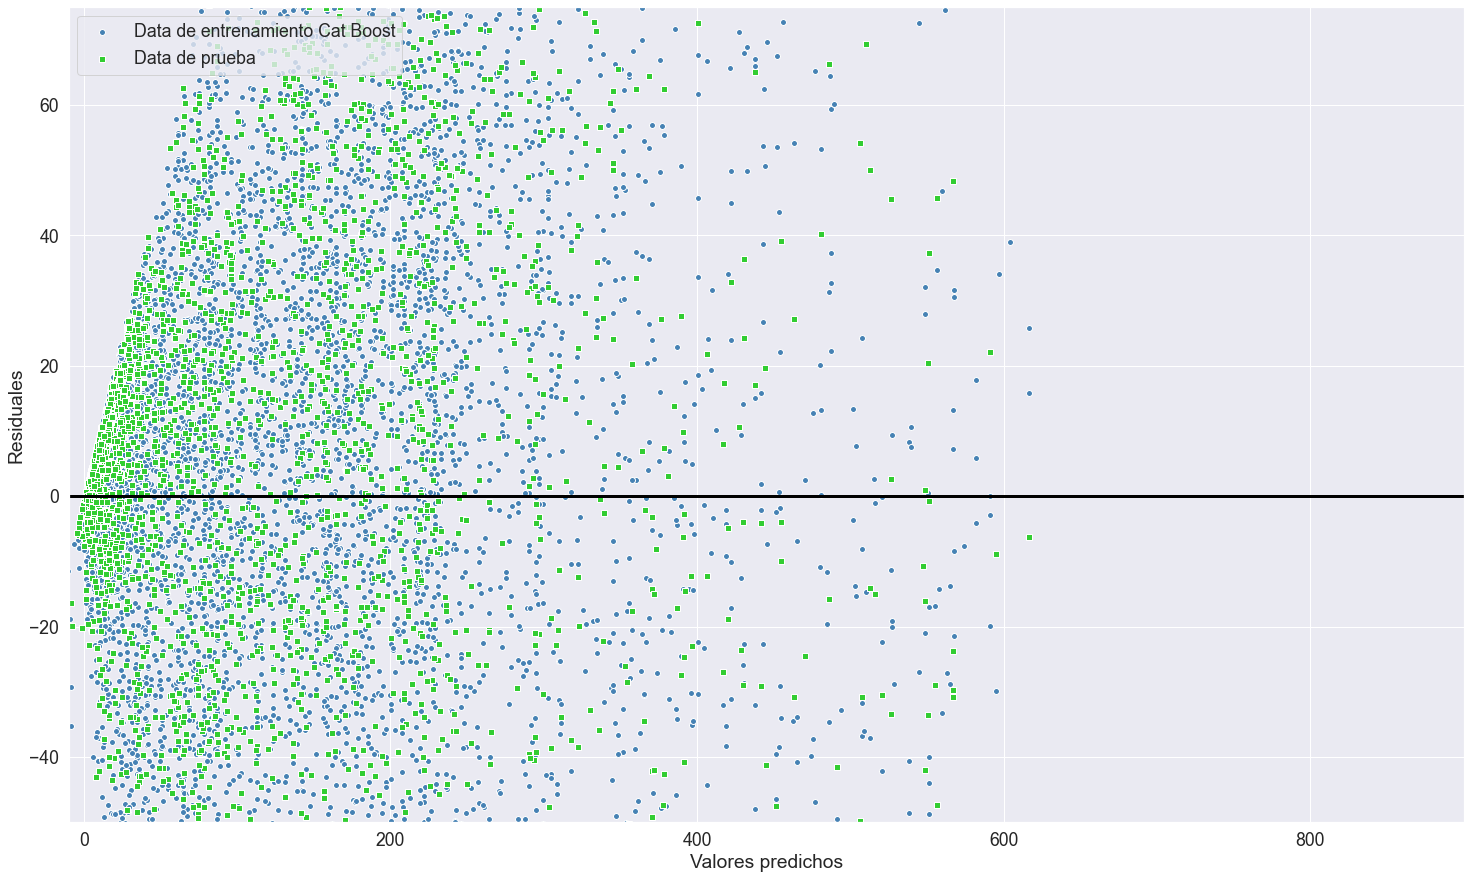

In [33]:
plt.scatter(Cat_Boost_reg_pred_train, Cat_Boost_reg_pred_train - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Data de entrenamiento Cat Boost')
plt.scatter(Cat_Boost_reg_pred_test, Cat_Boost_reg_pred_test - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Data de prueba')
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=900, color='black', lw=3)
plt.xlim([-10, 900])
plt.ylim([-50, 75])
#plt.tight_layout()

plt.show()

#### GRÁFICA Q-Q PLOT

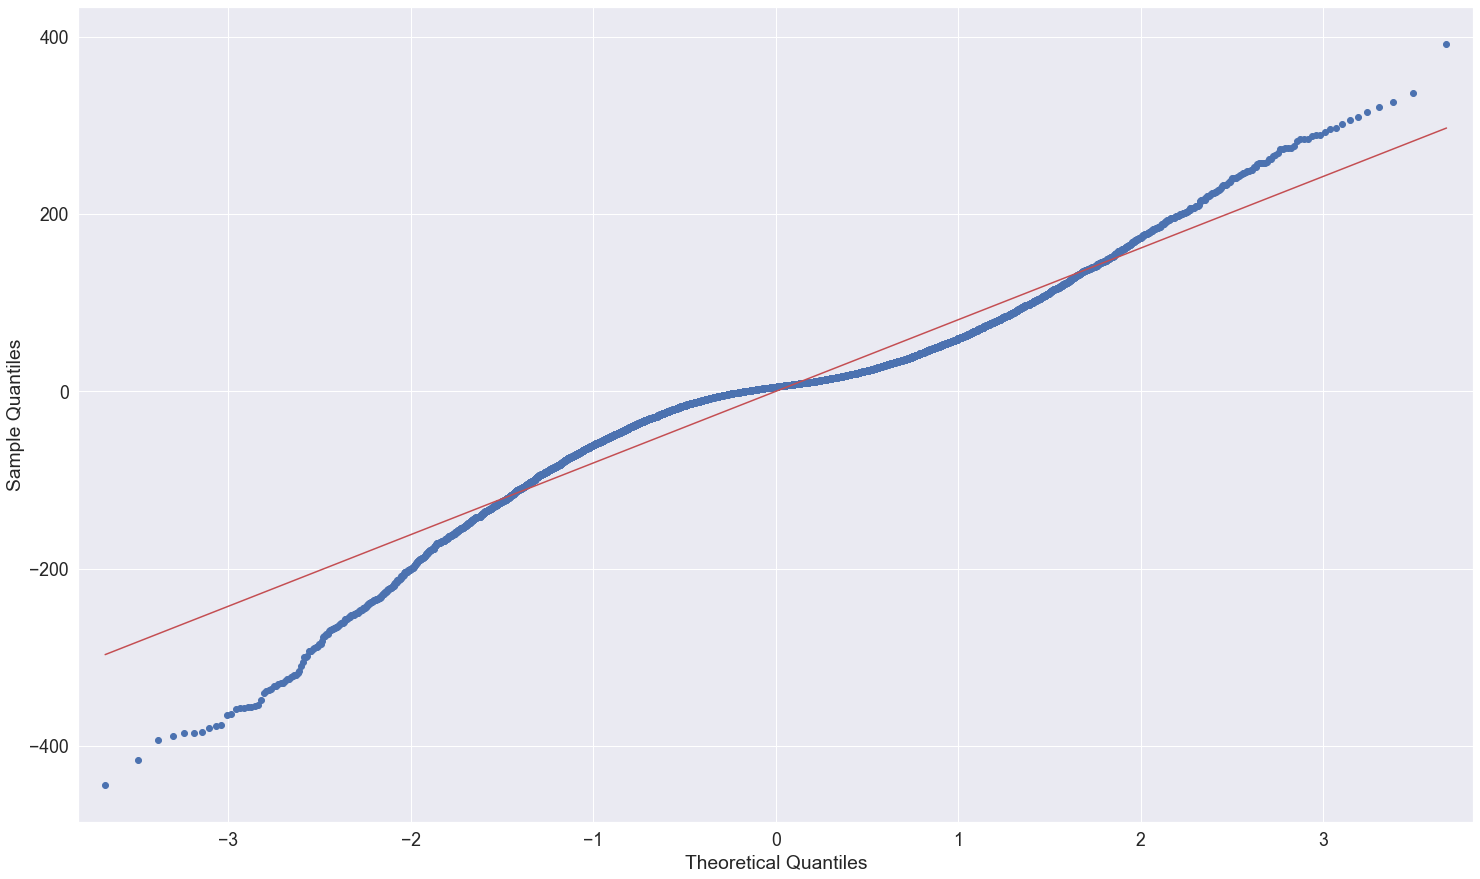

In [34]:
residuales = Cat_Boost_reg_pred_train - y_train

sm.qqplot(residuales,line='s')
pylab.show()

#### EVALUANDO EL DESEMPEÑO DEL MODELO

In [35]:
accuracy_Cat_Boost = mean_squared_error(y_train, Cat_Boost_reg_pred_train)
print('Cat_Boost - Root Mean square error:', np.sqrt(accuracy_Cat_Boost))
print('Cat_Boost - R2 accuracy : ',r2_score(y_train, Cat_Boost_reg_pred_train))

Cat_Boost - Root Mean square error: 80.80655324448541
Cat_Boost - R2 accuracy :  0.7178145410613668


# EVALUANDO EL MEJOR MODELO CON LA DATA DE PRUEBA (XGB - Root Mean square error: =  77.55290402111916)

#### REVISANDO LAS COLUMNAS DE NUESTRO DATASET "BIKE_TEST.xlsx"

In [36]:
bike_test = pd.read_excel("bike_test.xlsx")
bike_test.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0    12000 2012-05-20       2   1     5   4        0        0           0   
1    12001 2012-05-20       2   1     5   5        0        0           0   
2    12002 2012-05-20       2   1     5   6        0        0           0   
3    12003 2012-05-20       2   1     5   7        0        0           0   
4    12004 2012-05-20       2   1     5   8        0        0           0   

   weathersit  temp   atemp   hum  windspeed  
0           1  0.52  0.5000  0.68     0.0896  
1           1  0.50  0.4848  0.72     0.1045  
2           1  0.50  0.4848  0.63     0.1343  
3           1  0.52  0.5000  0.68     0.1940  
4           1  0.56  0.5303  0.56     0.1642

In [37]:
bike_test.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

Dado que nuestro dataset de prueba no cuenta con las columnas 'casual', 'registered', haremos las predicciones considerando las que si tiene que son: 'hr', 'temp', 'atemp'

In [38]:
x_test = bike_test[['hr', 'temp', 'atemp']]

#### REALIZANDO LAS PREDICCIONES

In [39]:
XGB_reg_pred_test = XGB_Regressor.predict(x_test)
XGB_reg_pred_test

array([ 6.258367, 16.386219, 75.5227  , ..., 60.872147, 80.141914,
       56.04133 ], dtype=float32)

In [40]:
y_pred_df = pd.DataFrame(XGB_reg_pred_test, columns = ['pred'])
y_pred_df.head()

pred
0    6.258367
1   16.386219
2   75.522697
3  209.799164
4  455.668274

In [41]:
y_pred_df.to_csv('jeampierrjimenez.csv', index=False)